## Import librairies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

!pip install rioxarray
!pip install earthpy

import folium
from folium import plugins
import rioxarray as rxr
import earthpy as et
import earthpy.spatial as es

# Import data from EarthPy
data = et.data.get_data('colorado-flood')

     |████████████████████████████████| 47 kB 3.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 69.9 MB/s 
     |████████████████████████████████| 6.3 MB 39.2 MB/s 
  Created wheel for rioxarray: filename=rioxarray-0.9.1-py3-none-any.whl size=54611 sha256=059632a9e55ddb27d96503da7579f07a6222fd46b0ef2ec887dc0551eb8a7afb
  Stored in directory: /root/.cache/pip/wheels/07/da/9e/1cc57b2e7a29a206893db83e984a341e2e94378263e0798229
Successfully built rioxarray
     |████████████████████████████████| 1.4 MB 22.4 MB/s 
     |████████████████████████████████| 1.0 MB 52.4 MB/s 
     |████████████████████████████████| 15.4 MB 54.4 MB/s 
Extracted output to /root/earth-analytics/data/colorado-flood/.


## Download and load data

### Downloding un unzipping the data

In [ ]:
!wget https://vicroadsopendatastorehouse.vicroads.vic.gov.au/opendata/Road_Safety/2000%20to%202005%20ACCIDENT.zip

--2022-01-13 00:30:59--  https://vicroadsopendatastorehouse.vicroads.vic.gov.au/opendata/Road_Safety/2000%20to%202005%20ACCIDENT.zip
Resolving vicroadsopendatastorehouse.vicroads.vic.gov.au (vicroadsopendatastorehouse.vicroads.vic.gov.au)... 104.17.50.85, 104.17.49.85, 2606:4700::6811:3255, ...
Connecting to vicroadsopendatastorehouse.vicroads.vic.gov.au (vicroadsopendatastorehouse.vicroads.vic.gov.au)|104.17.50.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22695036 (22M) [application/octet-stream]
Saving to: ‘2000 to 2005 ACCIDENT.zip’

2000 to 2005 ACCIDE 100%[===================>]  21.64M  11.4MB/s    in 1.9s    

2022-01-13 00:31:02 (11.4 MB/s) - ‘2000 to 2005 ACCIDENT.zip’ saved [22695036/22695036]



In [ ]:
!wget https://vicroadsopendatastorehouse.vicroads.vic.gov.au/opendata/Road_Safety/ACCIDENT.zip

--2022-01-13 00:31:02--  https://vicroadsopendatastorehouse.vicroads.vic.gov.au/opendata/Road_Safety/ACCIDENT.zip
Resolving vicroadsopendatastorehouse.vicroads.vic.gov.au (vicroadsopendatastorehouse.vicroads.vic.gov.au)... 104.17.50.85, 104.17.49.85, 2606:4700::6811:3255, ...
Connecting to vicroadsopendatastorehouse.vicroads.vic.gov.au (vicroadsopendatastorehouse.vicroads.vic.gov.au)|104.17.50.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36176162 (34M) [application/zip]
Saving to: ‘ACCIDENT.zip’

ACCIDENT.zip        100%[===================>]  34.50M  14.9MB/s    in 2.3s    

2022-01-13 00:31:05 (14.9 MB/s) - ‘ACCIDENT.zip’ saved [36176162/36176162]



In [ ]:
import shutil
shutil.unpack_archive('ACCIDENT.zip', 'accident')
shutil.unpack_archive('2000 to 2005 ACCIDENT.zip', 'accident_2000_2005')

### Loading the data into dataframes

In [ ]:
accident = pd.concat([pd.read_csv('accident_2000_2005/ACCIDENT.csv'), pd.read_csv('accident/ACCIDENT.csv')])
accident.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,ACCIDENT_TYPE,Accident Type Desc,DAY_OF_WEEK,Day Week Description,DCA_CODE,DCA Description,DIRECTORY,EDITION,PAGE,GRID_REFERENCE_X,GRID_REFERENCE_Y,LIGHT_CONDITION,Light Condition Desc,NODE_ID,NO_OF_VEHICLES,NO_PERSONS,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_KILLED,NO_PERSONS_NOT_INJ,POLICE_ATTEND,ROAD_GEOMETRY,Road Geometry Desc,SEVERITY,SPEED_ZONE
0,12000000389,4/01/2000,22.30.00,4,Collision with a fixed object,3,Tuesday,171,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICL...,MEL,40,88,H,11,5,Dark No street lights,25264,1,2,1,0,1,0,1,5,Not at intersection,1,90
1,12000000554,6/01/2000,22.15.00,4,Collision with a fixed object,5,Thursday,171,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICL...,MEL,40,87,C,1,3,Dark Street lights on,42800,1,1,1,0,0,0,1,2,T intersection,2,60
2,12000000555,1/01/2000,18.00.00,1,Collision with vehicle,7,Saturday,130,REAR END(VEHICLES IN SAME LANE),MEL,40,2P,C,6,1,Day,40101,4,4,1,1,0,2,1,2,T intersection,2,60
3,12000000559,2/01/2000,01.00.00,4,Collision with a fixed object,1,Sunday,181,OFF RIGHT BEND INTO OBJECT/PARKED VEHICLE ...,MEL,40,76,F,7,3,Dark Street lights on,127638,1,2,2,0,0,0,1,5,Not at intersection,2,60
4,12000000586,3/01/2000,23.50.00,1,Collision with vehicle,2,Monday,110,CROSS TRAFFIC(INTERSECTIONS ONLY),MEL,40,69,A,3,3,Dark Street lights on,57539,3,3,0,2,0,1,1,1,Cross intersection,3,70


In [ ]:
accident_chainage = pd.concat([pd.read_csv('accident_2000_2005/ACCIDENT_CHAINAGE.csv'), pd.read_csv('accident/ACCIDENT_CHAINAGE.csv')])
accident.head()

,ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,ACCIDENT_TYPE,Accident Type Desc,DAY_OF_WEEK,Day Week Description,DCA_CODE,DCA Description,DIRECTORY,EDITION,PAGE,GRID_REFERENCE_X,GRID_REFERENCE_Y,LIGHT_CONDITION,Light Condition Desc,NODE_ID,NO_OF_VEHICLES,NO_PERSONS,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_KILLED,NO_PERSONS_NOT_INJ,POLICE_ATTEND,ROAD_GEOMETRY,Road Geometry Desc,SEVERITY,SPEED_ZONE
0,12000000389,4/01/2000,22.30.00,4,Collision with a fixed object,3,Tuesday,171,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICL...,MEL,40,88,H,11,5,Dark No street lights,25264,1,2,1,0,1,0,1,5,Not at intersection,1,90
1,12000000554,6/01/2000,22.15.00,4,Collision with a fixed object,5,Thursday,171,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICL...,MEL,40,87,C,1,3,Dark Street lights on,42800,1,1,1,0,0,0,1,2,T intersection,2,60
2,12000000555,1/01/2000,18.00.00,1,Collision with vehicle,7,Saturday,130,REAR END(VEHICLES IN SAME LANE),MEL,40,2P,C,6,1,Day,40101,4,4,1,1,0,2,1,2,T intersection,2,60
3,12000000559,2/01/2000,01.00.00,4,Collision with a fixed object,1,Sunday,181,OFF RIGHT BEND INTO OBJECT/PARKED VEHICLE ...,MEL,40,76,F,7,3,Dark Street lights on,127638,1,2,2,0,0,0,1,5,Not at intersection,2,60
4,12000000586,3/01/2000,23.50.00,1,Collision with vehicle,2,Monday,110,CROSS TRAFFIC(INTERSECTIONS ONLY),MEL,40,69,A,3,3,Dark Street lights on,57539,3,3,0,2,0,1,1,1,Cross intersection,3,70


In [ ]:
accident_location = pd.concat([pd.read_csv('accident_2000_2005/ACCIDENT_LOCATION.csv'), pd.read_csv('accident/ACCIDENT_LOCATION.csv')])
accident_location.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ACCIDENT_NO,NODE_ID,ROAD_ROUTE_1,ROAD_NAME,ROAD_TYPE,ROAD_NAME_INT,ROAD_TYPE_INT,DISTANCE_LOCATION,DIRECTION_LOCATION,NEAREST_KM_POST,OFF_ROAD_LOCATION
0,12000000389,25264,2400.0,SPRINGVALE,ROAD,KEYLANA,DRIVE,113.0,N,NaN,NaN
1,12000000554,42800,2070.0,WARRIGAL,ROAD,IRENE,COURT,0.0,S,NaN,NaN
2,12000000555,40101,9999.0,GREY,STREET,ROBE,STREET,0.0,NW,NaN,NaN
3,12000000559,127638,5314.0,HAMPTON,STREET,BEACH,ROAD,34.0,N,NaN,NaN
4,12000000586,57539,2510.0,DANDENONG,ROAD,BELGRAVE,ROAD,0.0,W,NaN,NaN


In [ ]:
accident_atmosphere = pd.concat([pd.read_csv('accident_2000_2005/ATMOSPHERIC_COND.csv'), pd.read_csv('accident/ATMOSPHERIC_COND.csv')])
accident_atmosphere.head()

,ACCIDENT_NO,ATMOSPH_COND,ATMOSPH_COND_SEQ,Atmosph Cond Desc
0,12000000389,7,1,Strong winds
1,12000000554,1,1,Clear
2,12000000555,1,1,Clear
3,12000000559,1,1,Clear
4,12000000586,1,1,Clear


In [ ]:
accident_node = pd.concat([pd.read_csv('accident_2000_2005/NODE.csv'), pd.read_csv('accident/NODE.csv')])
accident_node.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ACCIDENT_NO,NODE_ID,NODE_TYPE,AMG_X,AMG_Y,LGA_NAME,Region Name,Deg Urban Name,Lat,Long,Postcode No,VICGRID94_X,VICGRID94_Y,LGA_NAME_ALL,REGION_NAME,DEG_URBAN_NAME,POSTCODE_NO
0,12000000389,25264,N,2512514.427,2388780.839,DANDENONG,METROPOLITAN SOUTH EAST REGION,Metropolitan Excluding CBD,-38.00211,145.14248,3173.0,NaN,NaN,NaN,NaN,NaN,NaN
1,12000000554,42800,I,2506548.994,2392856.260,KINGSTON,METROPOLITAN SOUTH EAST REGION,Metropolitan Excluding CBD,-37.96545,145.07453,3192.0,NaN,NaN,NaN,NaN,NaN,NaN
2,12000000555,40101,I,2498299.136,2404214.048,PORT PHILLIP,METROPOLITAN NORTH WEST REGION,Metropolitan Excluding CBD,-37.86314,144.98067,3182.0,NaN,NaN,NaN,NaN,NaN,NaN
3,12000000559,127638,N,2500115.047,2395234.944,BAYSIDE,METROPOLITAN SOUTH EAST REGION,Metropolitan Excluding CBD,-37.94404,145.00131,3188.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12000000586,57539,I,2505935.803,2401836.040,STONNINGTON,METROPOLITAN SOUTH EAST REGION,Metropolitan Excluding CBD,-37.88455,145.06748,3145.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
accident_person = pd.concat([pd.read_csv('accident_2000_2005/PERSON.csv'), pd.read_csv('accident/PERSON.csv')])
accident_person.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,9,10,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ACCIDENT_NO,PERSON_ID,VEHICLE_ID,SEX,AGE,Age Group,INJ_LEVEL,Inj Level Desc,SEATING_POSITION,HELMET_BELT_WORN,ROAD_USER_TYPE,Road User Type Desc,LICENCE_STATE,PEDEST_MOVEMENT,POSTCODE,TAKEN_HOSPITAL,EJECTED_CODE
0,12000000389,01,A,M,16.0,16-17,2,Serious injury,LF,1,3,Passengers,,0,NaN,Y,0
1,12000000389,A,A,M,19.0,17-21,1,Fatality,D,9,2,Drivers,V,0,3169.0,,0
2,12000000554,A,A,M,31.0,30-39,2,Serious injury,D,1,2,Drivers,V,0,NaN,Y,0
3,12000000555,A,A,M,27.0,26-29,2,Serious injury,D,1,2,Drivers,V,0,3039.0,Y,0
4,12000000555,B,B,F,32.0,30-39,3,Other injury,D,1,2,Drivers,V,0,3143.0,N,0


In [ ]:
accident_road_surface = pd.concat([pd.read_csv('accident_2000_2005/ROAD_SURFACE_COND.csv'), pd.read_csv('accident/ROAD_SURFACE_COND.csv')])
accident_road_surface.head()

,ACCIDENT_NO,SURFACE_COND,Surface Cond Desc,SURFACE_COND_SEQ
0,12000000389,9,Unknown,1
1,12000000554,1,Dry,1
2,12000000555,1,Dry,1
3,12000000559,1,Dry,1
4,12000000586,1,Dry,1


In [ ]:
accident_vehicle = pd.concat([pd.read_csv('accident_2000_2005/VEHICLE.csv'), pd.read_csv('accident/VEHICLE.csv')])
accident_vehicle.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,3,11,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,25,26,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ACCIDENT_NO,VEHICLE_ID,VEHICLE_YEAR_MANUF,VEHICLE_DCA_CODE,INITIAL_DIRECTION,ROAD_SURFACE_TYPE,Road Surface Type Desc,REG_STATE,VEHICLE_BODY_STYLE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_POWER,VEHICLE_TYPE,Vehicle Type Desc,VEHICLE_WEIGHT,CONSTRUCTION_TYPE,FUEL_TYPE,NO_OF_WHEELS,NO_OF_CYLINDERS,SEATING_CAPACITY,TARE_WEIGHT,TOTAL_NO_OCCUPANTS,CARRY_CAPACITY,CUBIC_CAPACITY,FINAL_DIRECTION,DRIVER_INTENT,VEHICLE_MOVEMENT,TRAILER_TYPE,VEHICLE_COLOUR_1,VEHICLE_COLOUR_2,CAUGHT_FIRE,INITIAL_IMPACT,LAMPS,LEVEL_OF_DAMAGE,OWNER_POSTCODE,TOWED_AWAY_FLAG,TRAFFIC_CONTROL,Traffic Control Desc
0,12000000389,A,1979.0,1,N,1,Paved,V,SEDAN,HOLDEN,,31,1,Car,NaN,R,P,4.0,6.0,5.0,1250.0,2.0,1250.0,NaN,N,1,18,H,WHI,ZZ,1,F,1,5,3169.0,1,0,No control
1,12000000554,A,1987.0,1,E,1,Paved,V,SEDAN,FORD,,32,1,Car,NaN,R,P,4.0,NaN,5.0,1300.0,1.0,1300.0,NaN,N,3,01,H,MRN,ZZ,2,F,1,4,3192.0,1,0,No control
2,12000000555,A,1991.0,1,SE,1,Paved,V,COUPE,B M W,,17,1,Car,NaN,R,P,4.0,NaN,5.0,1100.0,1.0,1100.0,NaN,SE,1,01,H,WHI,ZZ,2,F,0,5,3039.0,1,4,Ped. lights
3,12000000555,B,1998.0,2,SE,1,Paved,V,SEDAN,AUDI,,16,1,Car,NaN,R,P,4.0,4.0,5.0,1050.0,1.0,1050.0,NaN,SE,1,15,H,BLK,ZZ,2,F,0,5,3182.0,1,4,Ped. lights
4,12000000555,C,1998.0,8,SE,1,Paved,V,SEDAN,HOLDEN,,51,1,Car,NaN,R,P,4.0,8.0,5.0,1600.0,1.0,1600.0,NaN,SE,15,15,H,BLU,ZZ,2,F,0,2,3305.0,2,4,Ped. lights


## Data analysis

### Speed Analysis

In [ ]:
def plot_number_of_accidents_per_speed(dataset):

    tmp = dataset.groupby('SPEED_ZONE').count()

    labels = list(tmp.index)
    fig, ax= plt.subplots(figsize=(10,5))
    for i,j in zip(range(len(labels)), labels):
      if len(labels) != 0:
        bar = ax.bar(i, height=tmp.loc[j]['ACCIDENT_NO'], width=.8, color='C0')

        for p in bar:    
            height = p.get_height()
            count = tmp.loc[j]['ACCIDENT_NO']
            plt.text(i,
                      height + 500,
                      str(count),
                      ha='center',
                      weight='bold')
      else:
        pass
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels)
    fig.tight_layout()
    plt.title(f'Number of accidents per speed zone.')
    plt.show()

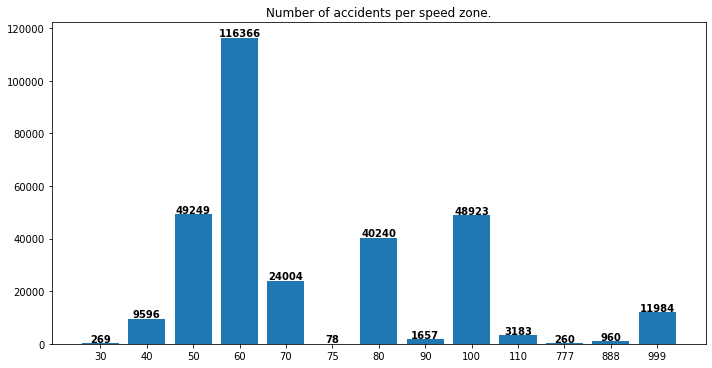

In [ ]:
plot_number_of_accidents_per_speed(accident)

In [ ]:
accident_location.ROAD_ROUTE_1.fillna(0)

In [ ]:
accident_location['ROAD_ROUTE_1'][accident_location['ROAD_ROUTE_1'].isna()].fillna(0, inplace=True)

In [ ]:
def number_to_type_of_road(t):
    
    if t <= 2000 and t<3000:
      return 'Highways'
    elif t <= 3000 and t<4000:
      return 'Forest Rds'
    elif t <= 4000 and t<5000:
      return 'Tourist Rds'
    elif t <= 5000 and t<6000:
      return 'Main Rds'
    elif t <= 7000 and t<8000:
      return 'Ramps Rds'
    else:
      return 'Unclassified Roads'

accident_location['ROAD_TYPE'] = accident_location.ROAD_ROUTE_1.fillna(0).apply(number_to_type_of_road)

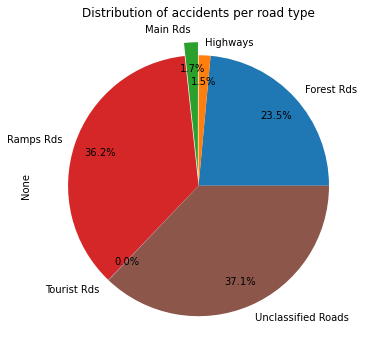

In [ ]:
accident_location.groupby('ROAD_TYPE').size().plot.pie(figsize=(15, 6),autopct='%1.1f%%', pctdistance=.8, explode=(0,0,0.1,0,0,0))
plt.title('Distribution of accidents per road type')
plt.show()

In [ ]:
def plot_number_of_deaths(dataset, column):

    tmp = dataset.groupby(column).sum()['NO_PERSONS_KILLED']

    labels = list(tmp.index)
    fig, ax = plt.subplots(figsize=(10,4))
    for i,j in zip(range(len(labels)), labels):
      if len(labels) != 0:
        bar = ax.bar(i, height=tmp.loc[j], width=.8, color='C0')

        for p in bar:    
            height = p.get_height()
            count = tmp.loc[j]
            plt.text(i,
                      height + 5,
                      str(count),
                      ha='center',
                      weight='bold')
        
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels)
    fig.tight_layout()
    plt.title(f'Number of deaths per ' + str(column) + '.')
    plt.show()

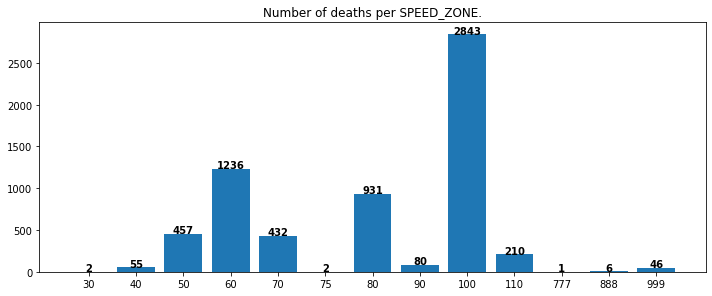

In [ ]:
plot_number_of_deaths(accident, 'SPEED_ZONE')

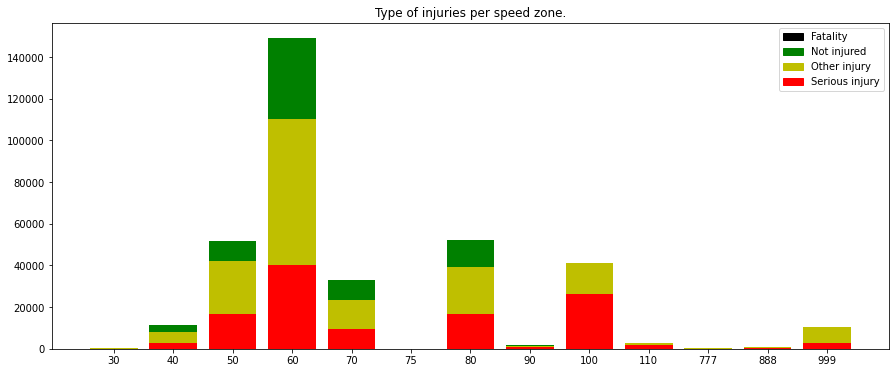

In [ ]:
c = ['k','g','y','r']
injuries  = accident_injuries.groupby('Inj Level Desc').size().index
speeds = accident_injuries.groupby('SPEED_ZONE').size().index
fig,ax = plt.subplots(figsize=(15,6))
for (inj, d), color in zip(accident_injuries.groupby('Inj Level Desc', group_keys=False), c):
    for speed in speeds:
      plt.bar(str(speed), d.groupby('SPEED_ZONE').size()[speed],color=color)
ax.set_title('Type of injuries per speed zone.')
plt.legend([plt.Rectangle((0,0),1,1, color=color) for color in c], injuries)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


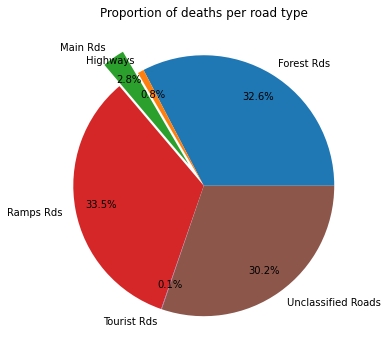

In [ ]:
accident.merge(accident_location,how='left', on='ACCIDENT_NO').groupby('ROAD_TYPE').sum()['NO_PERSONS_KILLED'].plot.pie(figsize=(15, 6),autopct='%1.1f%%', pctdistance=.8, explode=(0,0,0.2,0,0,0))
plt.axes().set_ylabel('')
plt.title('Proportion of deaths per road type')
plt.show()

In [ ]:
accident_loc_veh = accident.merge(accident_location,how='left', on='ACCIDENT_NO').merge(accident_vehicle, how='left',on='ACCIDENT_NO')
accident_loc_veh.head()

,ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,ACCIDENT_TYPE,Accident Type Desc,DAY_OF_WEEK,Day Week Description,DCA_CODE,DCA Description,DIRECTORY,EDITION,PAGE,GRID_REFERENCE_X,GRID_REFERENCE_Y,LIGHT_CONDITION,Light Condition Desc,NODE_ID_x,NO_OF_VEHICLES,NO_PERSONS,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_KILLED,NO_PERSONS_NOT_INJ,POLICE_ATTEND,ROAD_GEOMETRY,Road Geometry Desc,SEVERITY,SPEED_ZONE,YEAR,HOUR,TOTAL_INJURIES,NODE_ID_y,ROAD_ROUTE_1,ROAD_NAME,ROAD_TYPE,ROAD_NAME_INT,ROAD_TYPE_INT,DISTANCE_LOCATION,DIRECTION_LOCATION,NEAREST_KM_POST,OFF_ROAD_LOCATION,VEHICLE_ID,VEHICLE_YEAR_MANUF,VEHICLE_DCA_CODE,INITIAL_DIRECTION,ROAD_SURFACE_TYPE,Road Surface Type Desc,REG_STATE,VEHICLE_BODY_STYLE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_POWER,VEHICLE_TYPE,Vehicle Type Desc,VEHICLE_WEIGHT,CONSTRUCTION_TYPE,FUEL_TYPE,NO_OF_WHEELS,NO_OF_CYLINDERS,SEATING_CAPACITY,TARE_WEIGHT,TOTAL_NO_OCCUPANTS,CARRY_CAPACITY,CUBIC_CAPACITY,FINAL_DIRECTION,DRIVER_INTENT,VEHICLE_MOVEMENT,TRAILER_TYPE,VEHICLE_COLOUR_1,VEHICLE_COLOUR_2,CAUGHT_FIRE,INITIAL_IMPACT,LAMPS,LEVEL_OF_DAMAGE,OWNER_POSTCODE,TOWED_AWAY_FLAG,TRAFFIC_CONTROL,Traffic Control Desc
0,12000000389,4/01/2000,22.30.00,4,Collision with a fixed object,3,Tuesday,171,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICL...,MEL,40,88,H,11,5,Dark No street lights,25264,1,2,1,0,1,0,1,5,Not at intersection,1,90,2000,22,1,25264.0,2400.0,SPRINGVALE,Forest Rds,KEYLANA,DRIVE,113.0,N,NaN,NaN,A,1979.0,1,N,1.0,Paved,V,SEDAN,HOLDEN,,31,1.0,Car,NaN,R,P,4.0,6.0,5.0,1250.0,2.0,1250.0,NaN,N,1,18,H,WHI,ZZ,1.0,F,1.0,5.0,3169.0,1,0,No control
1,12000000554,6/01/2000,22.15.00,4,Collision with a fixed object,5,Thursday,171,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICL...,MEL,40,87,C,1,3,Dark Street lights on,42800,1,1,1,0,0,0,1,2,T intersection,2,60,2000,22,1,42800.0,2070.0,WARRIGAL,Forest Rds,IRENE,COURT,0.0,S,NaN,NaN,A,1987.0,1,E,1.0,Paved,V,SEDAN,FORD,,32,1.0,Car,NaN,R,P,4.0,NaN,5.0,1300.0,1.0,1300.0,NaN,N,3,01,H,MRN,ZZ,2.0,F,1.0,4.0,3192.0,1,0,No control
2,12000000555,1/01/2000,18.00.00,1,Collision with vehicle,7,Saturday,130,REAR END(VEHICLES IN SAME LANE),MEL,40,2P,C,6,1,Day,40101,4,4,1,1,0,2,1,2,T intersection,2,60,2000,18,2,40101.0,9999.0,GREY,Unclassified Roads,ROBE,STREET,0.0,NW,NaN,NaN,A,1991.0,1,SE,1.0,Paved,V,COUPE,B M W,,17,1.0,Car,NaN,R,P,4.0,NaN,5.0,1100.0,1.0,1100.0,NaN,SE,1,01,H,WHI,ZZ,2.0,F,0.0,5.0,3039.0,1,4,Ped. lights
3,12000000555,1/01/2000,18.00.00,1,Collision with vehicle,7,Saturday,130,REAR END(VEHICLES IN SAME LANE),MEL,40,2P,C,6,1,Day,40101,4,4,1,1,0,2,1,2,T intersection,2,60,2000,18,2,40101.0,9999.0,GREY,Unclassified Roads,ROBE,STREET,0.0,NW,NaN,NaN,B,1998.0,2,SE,1.0,Paved,V,SEDAN,AUDI,,16,1.0,Car,NaN,R,P,4.0,4.0,5.0,1050.0,1.0,1050.0,NaN,SE,1,15,H,BLK,ZZ,2.0,F,0.0,5.0,3182.0,1,4,Ped. lights
4,12000000555,1/01/2000,18.00.00,1,Collision with vehicle,7,Saturday,130,REAR END(VEHICLES IN SAME LANE),MEL,40,2P,C,6,1,Day,40101,4,4,1,1,0,2,1,2,T intersection,2,60,2000,18,2,40101.0,9999.0,GREY,Unclassified Roads,ROBE,STREET,0.0,NW,NaN,NaN,C,1998.0,8,SE,1.0,Paved,V,SEDAN,HOLDEN,,51,1.0,Car,NaN,R,P,4.0,8.0,5.0,1600.0,1.0,1600.0,NaN,SE,15,15,H,BLU,ZZ,2.0,F,0.0,2.0,3305.0,2,4,Ped. lights


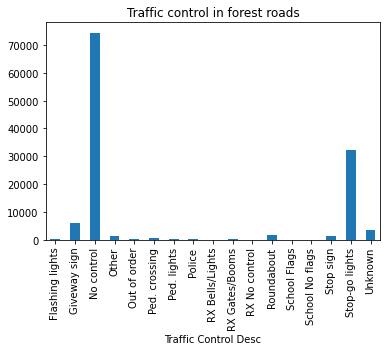

In [ ]:
accident_loc_veh[accident_loc_veh.ROAD_TYPE == 'Forest Rds'].groupby('Traffic Control Desc').size().plot.bar() #0.604580
plt.title('Traffic control in forest roads')
plt.show()

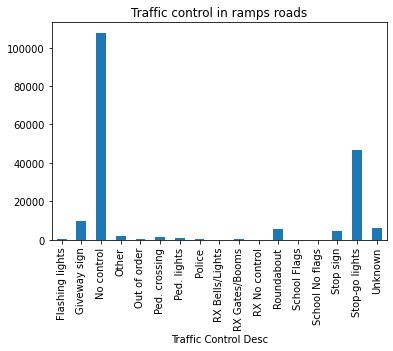

In [ ]:
accident_loc_veh[accident_loc_veh.ROAD_TYPE == 'Ramps Rds'].groupby('Traffic Control Desc').size().plot.bar() #0.580056
plt.title('Traffic control in ramps roads')
plt.show()

In [ ]:
forest_nodes = accident_loc_veh[(accident_loc_veh.ROAD_TYPE == 'Forest Rds') & (accident_loc_veh.TRAFFIC_CONTROL == 0)].NODE_ID_x#.to_list()

In [ ]:
dangerous_forest_nodes = forest_nodes.reset_index().groupby('NODE_ID_x').size().sort_values(ascending=False)[:10]

In [ ]:
dangerous_forest_nodes_df = accident_node[accident_node.NODE_ID.isin(dangerous_forest_nodes.index)].groupby('NODE_ID').mean()
dangerous_forest_nodes_df['count'] = accident_node[accident_node.NODE_ID.isin(dangerous_forest_nodes.index)].groupby('NODE_ID').size()

In [ ]:
ramps_nodes = accident_loc_veh[(accident_loc_veh.ROAD_TYPE == 'Ramps Rds') & (accident_loc_veh.TRAFFIC_CONTROL == 0)].NODE_ID_x#.to_list()

In [ ]:
dangerous_ramps_nodes = ramps_nodes.reset_index().groupby('NODE_ID_x').size().sort_values(ascending=False)[:20]

In [ ]:
dangerous_ramps_nodes_df = accident_node[accident_node.NODE_ID.isin(dangerous_ramps_nodes.index)].groupby('NODE_ID').mean()
dangerous_ramps_nodes_df['count'] = accident_node[accident_node.NODE_ID.isin(dangerous_ramps_nodes.index)].groupby('NODE_ID').size()

In [ ]:
m = folium.Map(location=[-38.03358, 144.96749])

for i in dangerous_forest_nodes_df.index:
  folium.Marker(
      location=[dangerous_forest_nodes_df.Lat[i], dangerous_forest_nodes_df.Long[i]], # coordinates for the marker (Earth Lab at CU Boulder)
      popup=str(dangerous_forest_nodes_df.loc[i]['count']), # pop-up label for the marker
      icon=folium.Icon(color='white', icon_color='white')
  ).add_to(m)

  folium.Marker(
            location=[dangerous_forest_nodes_df.Lat[i], dangerous_forest_nodes_df.Long[i]],
            icon=number_DivIcon('green',int(dangerous_forest_nodes_df.loc[i]['count']))
        ).add_to(m)

for i in dangerous_ramps_nodes_df.index:
  folium.Marker(
      location=[dangerous_ramps_nodes_df.Lat[i], dangerous_ramps_nodes_df.Long[i]], # coordinates for the marker (Earth Lab at CU Boulder)
      popup=str(dangerous_ramps_nodes_df.loc[i]['count']), # pop-up label for the marker
      icon=folium.Icon(color='white', icon_color='white')
  ).add_to(m)

  folium.Marker(
            location=[dangerous_ramps_nodes_df.Lat[i], dangerous_ramps_nodes_df.Long[i]],
            icon=number_DivIcon('blue',int(dangerous_ramps_nodes_df.loc[i]['count']))
        ).add_to(m)

m

### Year analysis

In [ ]:
def plot_number_of_accidents_per_year(dataset):

    dataset['YEAR'] = dataset['ACCIDENT_NO'].apply( lambda x : str(x)[1:5])
    tmp = dataset.groupby('YEAR').count()

    labels = list(tmp.index)
    fig, ax= plt.subplots(figsize=(10,5))
    for i,j in zip(range(len(labels)), labels):
      if len(labels) != 0:
        bar = ax.bar(i, height=tmp.loc[j]['ACCIDENT_NO'], width=.8, color='C0')

        for p in bar:    
            height = p.get_height()
            count = tmp.loc[j]['ACCIDENT_NO']
            plt.text(i,
                      height + 500,
                      str(count),
                      ha='center',
                      weight='bold')
      else:
        pass
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels)
    fig.tight_layout()
    plt.title(f'Number of accidents per year.')
    plt.show()

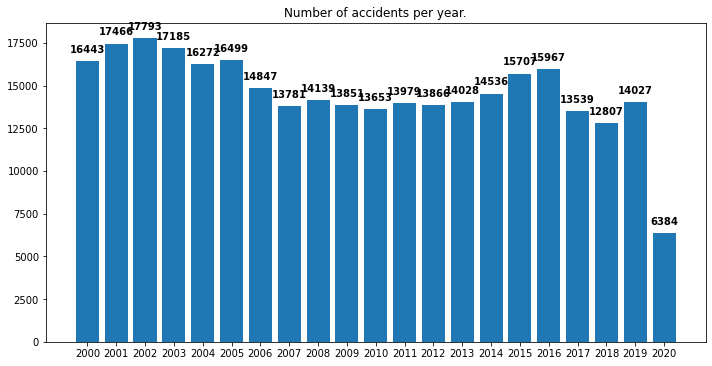

In [ ]:
plot_number_of_accidents_per_year(accident)

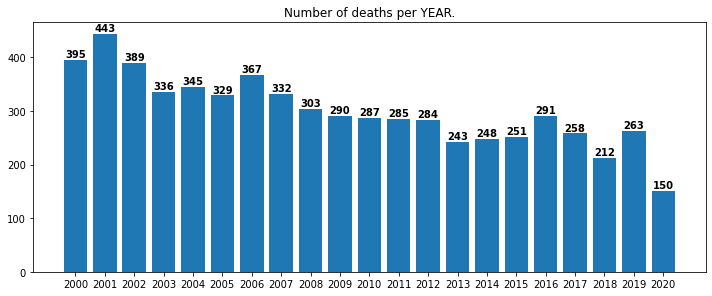

In [ ]:
plot_number_of_deaths(accident, 'YEAR')

In [ ]:
accident_injuries = accident.merge(accident_person, how='left', on='ACCIDENT_NO')
accident_injuries

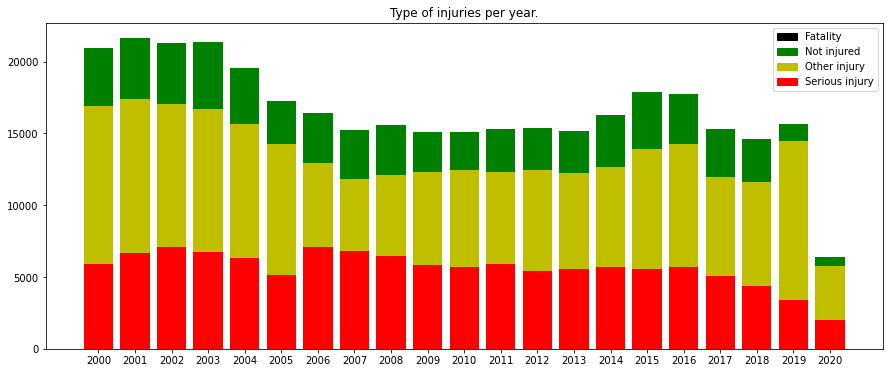

In [ ]:
c = ['k','g','y','r']
injuries  = accident_injuries.groupby('Inj Level Desc').size().index
years = accident_injuries.groupby('YEAR').size().index
fig,ax = plt.subplots(figsize=(15,6))
for (inj, d), color in zip(accident_injuries.groupby('Inj Level Desc', group_keys=False), c):
    for year in years:
      plt.bar(year, d.groupby('YEAR').size()[year],color=color)
ax.set_title('Type of injuries per year.')
plt.legend([plt.Rectangle((0,0),1,1, color=color) for color in c], injuries)
plt.show()

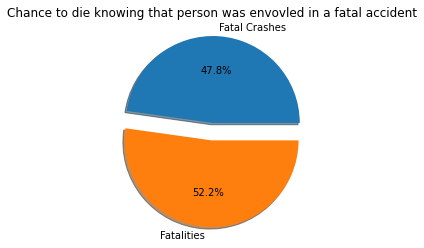

In [ ]:
plt.pie([len(accident[accident['SEVERITY'] == 1]), accident[accident['SEVERITY'] == 1].sum()['NO_PERSONS_KILLED'] ],
        labels = ['Fatal Crashes', 'Fatalities'],
        explode = (0.1, 0.1), shadow = True, autopct='%1.1f%%')
plt.title('Chance to die knowing that person was envovled in a fatal accident')
plt.show()

### DCA analysis

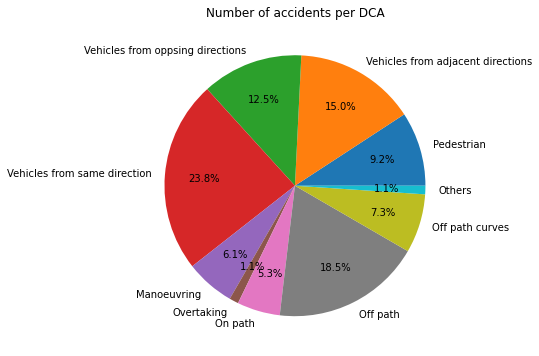

In [ ]:
accident_per_dca = accident.groupby('DCA_CODE').count()

number_of_accident_per_dca = dict()
type_of_crashes = ['Pedestrian', 'Vehicles from adjacent directions', 'Vehicles from oppsing directions',
                           'Vehicles from same direction', 'Manoeuvring', 'Overtaking', 'On path', 'Off path',
                           'Off path curves', 'Others']
for i, key in zip(range(100,200,10), type_of_crashes):
  number_of_accident_per_dca[key] = accident_per_dca.loc[i:i+9]['ACCIDENT_NO'].sum()

labels = [k for k in number_of_accident_per_dca.keys()]
data   = [float(v) for v in number_of_accident_per_dca.values()]

plt.figure(figsize=(15,6))
plt.pie(x = data, labels=labels, autopct="%.1f%%", pctdistance=0.7)
plt.title('Number of accidents per DCA')
plt.show()

In [ ]:
accident.groupby(['DCA_CODE','YEAR']).size().loc[100:109].sum(level=1)

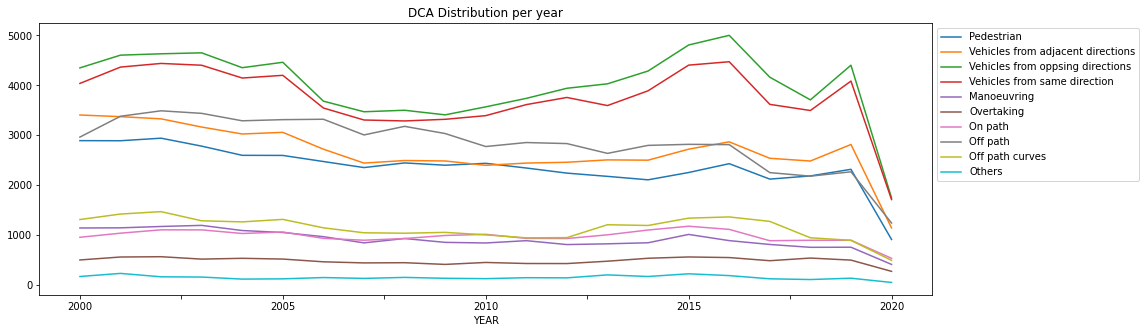

In [ ]:
for i, key in zip(range(100,200,10), type_of_crashes):
  accident.groupby(['DCA_CODE','YEAR']).size().loc[i:i+10].sum(level=1).plot(label=key, figsize=(16,5))
plt.legend(bbox_to_anchor=(1, 1))
plt.title('DCA Distribution per year')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


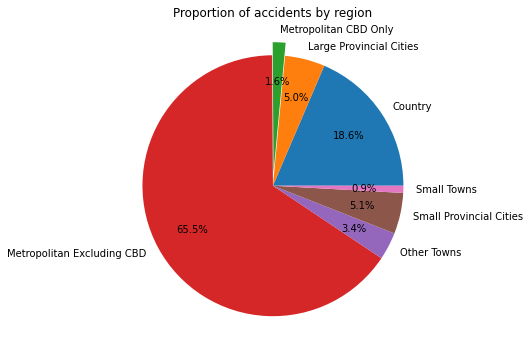

In [ ]:
accident_node.groupby('Deg Urban Name').size().plot.pie(figsize=(15,6), autopct="%.1f%%", pctdistance=0.7,
                                                        explode=(0,0,0.1,0,0,0,0))
plt.title('Proportion of accidents by region')
plt.axes().set_ylabel('')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


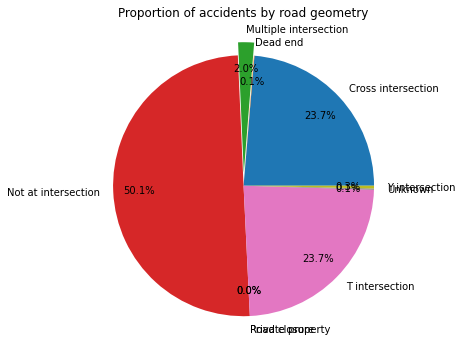

In [ ]:
accident.groupby('Road Geometry Desc').size().plot.pie(autopct="%.1f%%", pctdistance=0.8, figsize=(10,6),
                                                       explode=(0,0,0.1,0,0,0,0,0,0))
plt.title('Proportion of accidents by road geometry')
plt.axes().set_ylabel('')
plt.show()

### Day time analysis

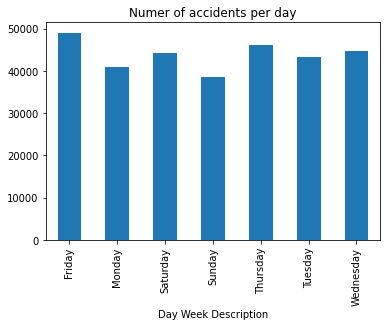

In [ ]:
accident.groupby('Day Week Description').size().plot.bar()
plt.title('Numer of accidents per day')
plt.show()

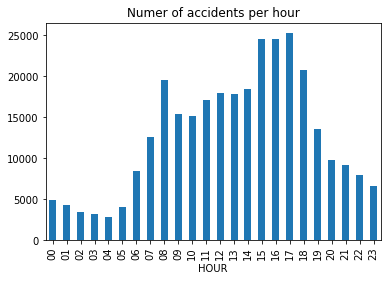

In [ ]:
accident['HOUR'] = accident.ACCIDENTTIME.apply(lambda t : str(t)[:2])
accident.groupby('HOUR').size()[:-1].plot.bar()
plt.title('Numer of accidents per hour')
plt.show()

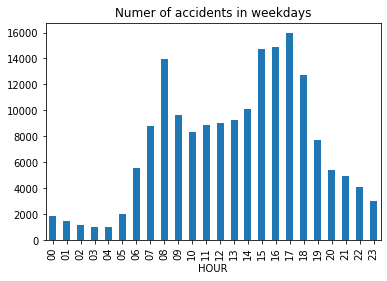

In [ ]:
accident[accident['DAY_OF_WEEK'].isin([2,3,4,5])].groupby('HOUR').size()[:-1].plot.bar()
plt.title('Numer of accidents in weekdays')
plt.show()

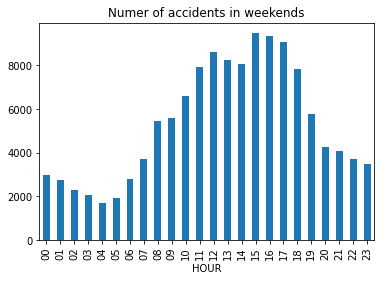

In [ ]:
accident[accident['DAY_OF_WEEK'].isin([1,6,7])].groupby('HOUR').size()[:-1].plot.bar()
plt.title('Numer of accidents in weekends')
plt.show()

### Weather analysis

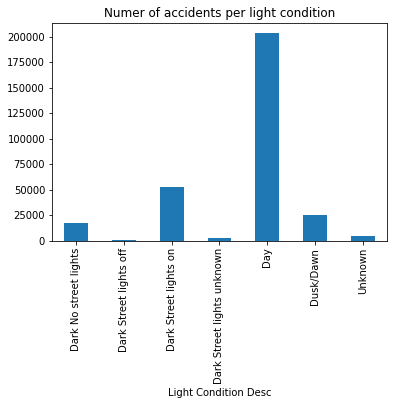

In [ ]:
accident.groupby('Light Condition Desc').size().plot.bar()
plt.title('Numer of accidents per light condition')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


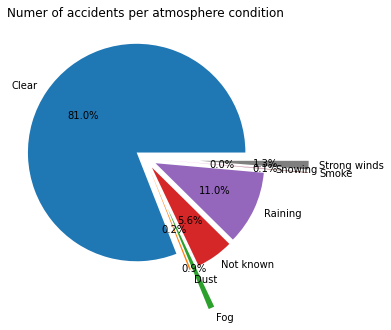

In [ ]:
accident_atmosphere.groupby('Atmosph Cond Desc').size().plot.pie(figsize=(16,5),explode=(0.1,0.1,0.5,0.1,0.1,0.5,0.1,0.5), autopct='%1.1f%%')
plt.title('Numer of accidents per atmosphere condition')
plt.axes().set_ylabel('')
plt.show()

In [ ]:
accident_road_surface.groupby('Surface Cond Desc').size() / accident_road_surface.groupby('Surface Cond Desc').size().sum() # / accident_road_surface['Surface Cond Desc'].sum()

Surface Cond Desc
Dry        0.784884
Icy        0.002827
Muddy      0.005363
Snowy      0.000545
Unknown    0.040212
Wet        0.166170
dtype: float64

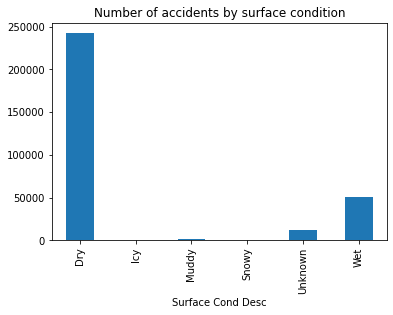

In [ ]:
accident_road_surface.groupby('Surface Cond Desc').size().plot.bar()
plt.title('Number of accidents by surface condition') # dry 78% wet 16%
plt.show()

### Demoghraphic analysis

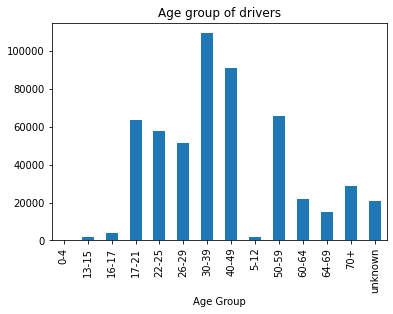

In [ ]:
accident_person[accident_person['SEATING_POSITION'] == 'D '].groupby('Age Group').size().plot.bar()
plt.title('Age group of drivers')
plt.show()

In [ ]:
ages = accident_person['Age Group'].unique()
injuries = accident_person['Inj Level Desc'].unique()

In [ ]:
inj_dict = dict()
for inj in injuries:
  inj_dict[inj] = accident_person[accident_person['Inj Level Desc'] == inj].groupby('Age Group').size().to_list()
inj_dict

{'Fatality': [80,
  91,
  188,
  799,
  557,
  488,
  944,
  808,
  95,
  665,
  325,
  254,
  994,
  19],
 'Not injured': [11020,
  6480,
  7510,
  39772,
  33573,
  28385,
  59010,
  48991,
  15086,
  35545,
  12261,
  8691,
  14630,
  30473],
 'Other injury': [4317,
  5962,
  6689,
  35674,
  29690,
  25615,
  51587,
  42046,
  11087,
  31149,
  10423,
  7576,
  15652,
  5575],
 'Serious injury': [1019,
  1995,
  2958,
  15515,
  12720,
  10229,
  20157,
  16725,
  2823,
  13053,
  4905,
  3834,
  11208,
  2059],
 'Unknown': [17]}

In [ ]:
age_dict = dict()
for age in ages:
  age_dict[age] = accident_person[accident_person['Age Group'] == age].groupby('Inj Level Desc').size().to_list()
age_dict

{'0-4': [80, 11020, 4317, 1019],
 '13-15': [91, 6480, 5962, 1995],
 '16-17': [188, 7510, 6689, 2958],
 '17-21': [799, 39772, 35674, 15515],
 '22-25': [557, 33573, 29690, 12720],
 '26-29': [488, 28385, 25615, 10229],
 '30-39': [944, 59010, 51587, 20157],
 '40-49': [808, 48991, 42046, 16725],
 '5-12': [95, 15086, 11087, 2823],
 '50-59': [665, 35545, 31149, 13053],
 '60-64': [325, 12261, 10423, 4905],
 '64-69': [254, 8691, 7576, 3834],
 '70+': [994, 14630, 15652, 11208],
 'unknown': [19, 30473, 5575, 2059, 17]}

In [ ]:
accident_person.groupby('Inj Level Desc').size().index

Index(['Fatality', 'Not injured', 'Other injury', 'Serious injury'], dtype='object', name='Inj Level Desc')

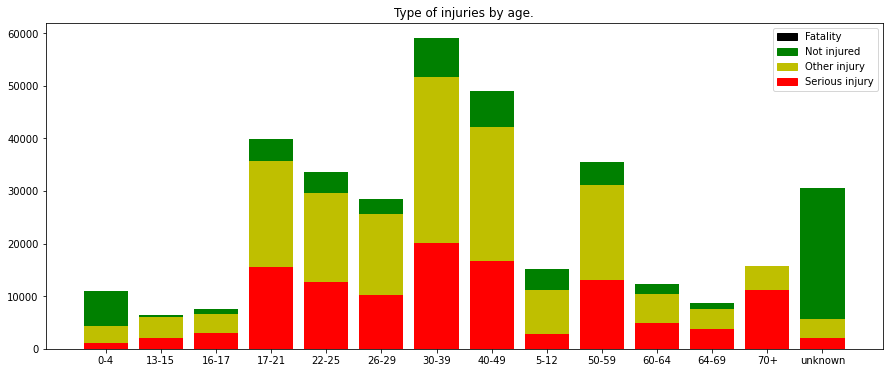

In [ ]:
c = ['k','g','y','r']
injuries  = accident_person.groupby('Inj Level Desc').size().index
ages = accident_person.groupby('Age Group').size().index
fig,ax = plt.subplots(figsize=(15,6))
for (inj, d), color in zip(accident_person.groupby('Inj Level Desc', group_keys=False), c):
    for age in ages:
      plt.bar(age, d.groupby('Age Group').size()[age],color=color)
ax.set_title('Type of injuries by age.')
plt.legend([plt.Rectangle((0,0),1,1, color=color) for color in c], injuries)
plt.show()

In [ ]:
accident_person.groupby(['Age Group','SEX']).size()

Age Group  SEX
0-4        F       2889
           M       3029
           U         25
13-15      F       2919
           M       3087
           U         62
16-17      F       3362
           M       4089
           U         30
17-21      F      15230
           M      22401
           U         51
22-25      F      10789
           M      16500
           U         19
26-29      F       8818
           M      14017
           U         21
30-39      F      18374
           M      28656
           U         29
40-49      F      15231
           M      21093
           U         22
5-12       F       5283
           M       6189
           U         81
50-59      F      10316
           M      14218
           U         17
60-64      F       3068
           M       4576
           U          7
64-69      F       2358
           M       3244
           U          8
70+        F       5701
           M       6712
           U         10
unknown    F       4877
           M       4806
 

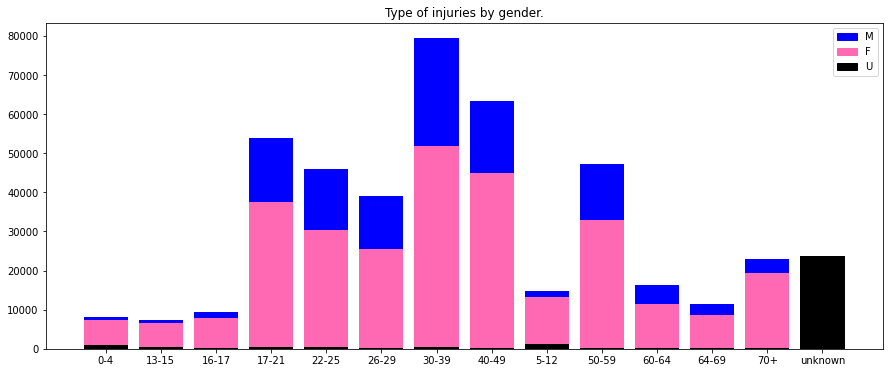

In [ ]:
c = ['b' ,'hotpink', 'k']
genders = accident_person.groupby('SEX', sort=False).size().index
ages = accident_person.groupby('Age Group').size().index
fig,ax = plt.subplots(figsize=(15,6))
for (sex, d), color in zip(accident_person.groupby('SEX', group_keys=False, sort=False), c):
    for age in ages:
      plt.bar(age, d.groupby('Age Group').size()[age],color=color)
ax.set_title('Type of injuries by gender.')
plt.legend([plt.Rectangle((0,0),1,1, color=color) for color in c], genders)
plt.show()

### Nodes analysis

In [ ]:
BBox = (accident_node.Long.min(),   accident_node.Long.max(),      
         accident_node.Lat.min(), accident_node.Lat.max())
BBox

(140.96617759999998, 149.75794, -39.03358, -34.06238044)

In [ ]:
m = folium.Map(location=[-38.03358, 144.96749])
m

In [ ]:
tmp_n = accident_node[accident_node['NODE_TYPE'] == 'N'][:100]
tmp_i = accident_node[accident_node['NODE_TYPE'] == 'I'][:100]  

In [ ]:
nodes_with_more_accidents = accident_node.groupby('NODE_ID').size().sort_values()[-25:]
nodes_with_more_accidents_df = accident_node[accident_node.NODE_ID.isin(nodes_with_more_accidents.index)].drop_duplicates('NODE_ID')
nodes_with_more_accidents_df['count'] = accident_node.groupby('NODE_ID').size().sort_values()[-25:].to_list()

In [ ]:
accident['TOTAL_INJURIES'] = accident[['NO_PERSONS_INJ_2', 'NO_PERSONS_INJ_3']].sum(1)
nodes_with_more_injuries = accident.groupby('NODE_ID').sum().sort_values('TOTAL_INJURIES', ascending=False)[:25]
nodes_with_more_injuries_df = accident_node[accident_node.NODE_ID.isin(nodes_with_more_injuries.index)].drop_duplicates('NODE_ID')
nodes_with_more_injuries_df['count'] = nodes_with_more_injuries_df.merge(nodes_with_more_injuries.TOTAL_INJURIES.reset_index(), on='NODE_ID', how='inner').set_index('NODE_ID').TOTAL_INJURIES.to_list()

In [ ]:
from folium.features import DivIcon

def number_DivIcon(color,number):

    icon = DivIcon(
            icon_size=(150,36),
            icon_anchor=(14,40),
#             html='<div style="font-size: 18pt; align:center, color : black">' + '{:02d}'.format(num+1) + '</div>',
            html="""<span class="fa-stack " style="font-size: 12pt" >>
                    <!-- The icon that will wrap the number -->
                    <span class="fa fa-circle-o fa-stack-2x" style="color : {:s}"></span>
                    <!-- a strong element with the custom content, in this case a number -->
                    <strong class="fa-stack-1x">
                         {:02d}  
                    </strong>
                </span>""".format(color,number)
        )
    return icon

In [ ]:
m = folium.Map(location=[-38.03358, 144.96749])

for i in nodes_with_more_accidents_df.index:
  folium.Marker(
      location=[nodes_with_more_accidents_df.Lat[i], nodes_with_more_accidents_df.Long[i]], # coordinates for the marker (Earth Lab at CU Boulder)
      popup=str(nodes_with_more_accidents_df.loc[i]['count']), # pop-up label for the marker
      icon=folium.Icon(color='white', icon_color='white')
  ).add_to(m)

  folium.Marker(
            location=[nodes_with_more_accidents_df.Lat[i], nodes_with_more_accidents_df.Long[i]],
            icon=number_DivIcon('green',nodes_with_more_accidents_df.loc[i]['count'])
        ).add_to(m)

for i in nodes_with_more_injuries_df.index:
  folium.Marker(
      location=[nodes_with_more_injuries_df.Lat[i], nodes_with_more_injuries_df.Long[i]], # coordinates for the marker (Earth Lab at CU Boulder)
      popup=str(nodes_with_more_injuries_df.loc[i]['count']), # pop-up label for the marker
      icon=folium.Icon(color='white', icon_color='white')
  ).add_to(m)

  folium.Marker(
            location=[nodes_with_more_injuries_df.Lat[i], nodes_with_more_injuries_df.Long[i]],
            icon=number_DivIcon('red', int(nodes_with_more_injuries_df.loc[i]['count']))
        ).add_to(m)

m

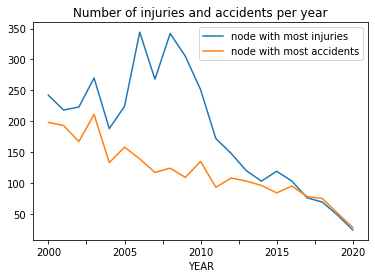

In [ ]:
accident[accident.NODE_ID.isin(nodes_with_more_injuries.index)].groupby('YEAR').sum().TOTAL_INJURIES.plot(label='node with most injuries')
accident[accident.NODE_ID.isin(nodes_with_more_accidents.index)].groupby('YEAR').sum().TOTAL_INJURIES.plot(label='node with most accidents')
plt.legend()
plt.title('Number of injuries and accidents per year')
plt.show()

### Regression



*   This simple model aims to predict number of deaths per accident given many variables such as weather condition, speed zone, time of the accident ...   
*   Model was trained on 2000 ~ 2016 dataset and tested on 2017 ~ 2019 data.


In [ ]:
data = accident[['ACCIDENT_NO', 'ACCIDENTDATE', 'ACCIDENTTIME', 'ACCIDENT_TYPE', 'DAY_OF_WEEK', 'LIGHT_CONDITION', 'ROAD_GEOMETRY',
          'SPEED_ZONE', 'HOUR', 'NO_PERSONS_INJ_2',
       'NO_PERSONS_INJ_3', 'NO_PERSONS_KILLED']]

In [ ]:
accident_atmosphere.columns

Index(['ACCIDENT_NO', 'ATMOSPH_COND', 'ATMOSPH_COND_SEQ', 'Atmosph Cond Desc'], dtype='object')

In [ ]:
data = data.merge(accident_atmosphere[['ACCIDENT_NO', 'ATMOSPH_COND']], how='left', on='ACCIDENT_NO')

In [ ]:
data['ATMOSPH_COND'].fillna(9, inplace = True)
data[data.ATMOSPH_COND.isna()]

,ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,ACCIDENT_TYPE,DAY_OF_WEEK,LIGHT_CONDITION,ROAD_GEOMETRY,SPEED_ZONE,HOUR,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_KILLED,ATMOSPH_COND


In [ ]:
data = data.merge(accident_road_surface[['ACCIDENT_NO', 'SURFACE_COND']], how='left', on='ACCIDENT_NO')

In [ ]:
data['SURFACE_COND'].fillna(9, inplace = True)
data[data.SURFACE_COND.isna()]

,ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,ACCIDENT_TYPE,DAY_OF_WEEK,LIGHT_CONDITION,ROAD_GEOMETRY,SPEED_ZONE,HOUR,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_KILLED,ATMOSPH_COND,SURFACE_COND


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311593 entries, 0 to 311592
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ACCIDENT_NO        311593 non-null  object 
 1   ACCIDENTDATE       311593 non-null  object 
 2   ACCIDENTTIME       311373 non-null  object 
 3   ACCIDENT_TYPE      311593 non-null  int64  
 4   DAY_OF_WEEK        311593 non-null  int64  
 5   LIGHT_CONDITION    311593 non-null  int64  
 6   ROAD_GEOMETRY      311593 non-null  int64  
 7   SPEED_ZONE         311593 non-null  int64  
 8   HOUR               311593 non-null  object 
 9   NO_PERSONS_INJ_2   311593 non-null  int64  
 10  NO_PERSONS_INJ_3   311593 non-null  int64  
 11  NO_PERSONS_KILLED  311593 non-null  int64  
 12  ATMOSPH_COND       311593 non-null  float64
 13  SURFACE_COND       311593 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 35.7+ MB


In [ ]:
data.ATMOSPH_COND = data.ATMOSPH_COND.map(np.int64)

In [ ]:
data.SURFACE_COND = data.SURFACE_COND.map(np.int64)

In [ ]:
data.HOUR.replace('na', 0, inplace=True)
data.HOUR = data.HOUR.map(np.int64)

In [ ]:
def hour_to_time_of_day(t):
    if t <= 0 & t<7:
      return 1
    elif t <= 7 & t<13:
      return 2
    elif t <= 13 & t<19:
      return 3
    else:
      return 4

data['hour'] = data.HOUR.apply(hour_to_time_of_day)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311593 entries, 0 to 311592
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ACCIDENT_NO        311593 non-null  object
 1   ACCIDENTDATE       311593 non-null  object
 2   ACCIDENTTIME       311373 non-null  object
 3   ACCIDENT_TYPE      311593 non-null  int64 
 4   DAY_OF_WEEK        311593 non-null  int64 
 5   LIGHT_CONDITION    311593 non-null  int64 
 6   ROAD_GEOMETRY      311593 non-null  int64 
 7   SPEED_ZONE         311593 non-null  int64 
 8   HOUR               311593 non-null  int64 
 9   NO_PERSONS_INJ_2   311593 non-null  int64 
 10  NO_PERSONS_INJ_3   311593 non-null  int64 
 11  NO_PERSONS_KILLED  311593 non-null  int64 
 12  ATMOSPH_COND       311593 non-null  int64 
 13  SURFACE_COND       311593 non-null  int64 
 14  hour               311593 non-null  int64 
dtypes: int64(12), object(3)
memory usage: 38.0+ MB


In [ ]:
data['YEAR'] = data['ACCIDENT_NO'].apply( lambda x : int(str(x)[1:5]))

In [ ]:
data_train = data[data['YEAR'].isin([i for i in range(2000,2017)])]

In [ ]:
data_test = data[data['YEAR'].isin([i for i in range(2017,2019)])]

In [ ]:
data_train.shape, data_test.shape

((263934, 16), (26843, 16))

In [ ]:
data.columns

Index(['ACCIDENT_NO', 'ACCIDENTTIME', 'ACCIDENT_TYPE', 'DAY_OF_WEEK',
       'LIGHT_CONDITION', 'ROAD_GEOMETRY', 'SPEED_ZONE', 'HOUR',
       'NO_PERSONS_INJ_2', 'NO_PERSONS_INJ_3', 'NO_PERSONS_KILLED',
       'ATMOSPH_COND', 'SURFACE_COND', 'YEAR'],
      dtype='object')

In [ ]:
data_train_y = data_train[['NO_PERSONS_KILLED', 'NO_PERSONS_INJ_2', 'NO_PERSONS_INJ_3']].sum(1)
data_test_y = data_test[['NO_PERSONS_KILLED', 'NO_PERSONS_INJ_2', 'NO_PERSONS_INJ_3']].sum(1)

In [ ]:
data_train_x = data_train[['ACCIDENT_TYPE', 'DAY_OF_WEEK',
       'LIGHT_CONDITION', 'ROAD_GEOMETRY', 'SPEED_ZONE', 'hour',
       'ATMOSPH_COND', 'SURFACE_COND']]

data_test_x = data_test[['ACCIDENT_TYPE', 'DAY_OF_WEEK',
       'LIGHT_CONDITION', 'ROAD_GEOMETRY', 'SPEED_ZONE', 'hour',
       'ATMOSPH_COND', 'SURFACE_COND']]

In [ ]:
from xgboost import *

model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [ ]:
model.fit(data_train_x, data_train_y)

[00:37:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.8, eta=0.1, max_depth=7, n_estimators=1000,
             subsample=0.7)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE

pred = model.predict(data_test_x)

rmse = np.sqrt(MSE(data_test_y, pred))
print("RMSE : % f" %(rmse))

RMSE :  0.694211


In [ ]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(13)

In [ ]:
knn.fit(data_train_x, data_train_y)

KNeighborsRegressor(n_neighbors=13)

In [ ]:
pred_knn = knn.predict(data_test_x)

rmse = np.sqrt(MSE(data_test_y, pred_knn))
print("RMSE : % f" %(rmse))

RMSE :  0.722183


In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(max_depth=2, random_state=0)

random_forest.fit(data_train_x, data_train_y)

RandomForestRegressor(max_depth=2, random_state=0)

In [ ]:
pred_random_forest = random_forest.predict(data_test_x)

rmse = np.sqrt(MSE(data_test_y, pred_random_forest))
print("RMSE : % f" %(rmse))

RMSE :  0.699003
